In [0]:
import time
import os
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from keras.datasets import mnist
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.19.23.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.19.23.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, '0')

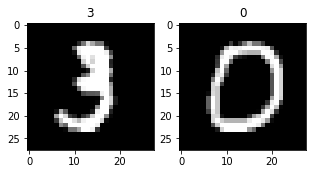

In [0]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img = np.reshape(x_train[10], (28,28))
curr_lbl = y_train[10]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)


plt.subplot(122)
curr_img = np.reshape(x_test[10], (28,28))
curr_lbl = y_test[10]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)

In [0]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
noisy_train =[]
for image in x_train:
    row,col,ch= image.shape
    mean = 0
    var = random.randint(100, 300)
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch)).astype(np.float32)
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    noisy_train.append(noisy)

In [0]:
noisy_test =[]
for image in x_test:
    row,col,ch= image.shape
    mean = 0
    var = random.randint(100, 300)
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    image = image + gauss
    noisy_test.append(image)

Text(0.5, 1.0, '0')

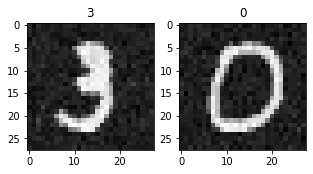

In [0]:
plt.figure(figsize=[5,5])

plt.subplot(121)
curr_img = np.reshape(noisy_train[10], (28,28))
curr_lbl = y_train[10]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)


plt.subplot(122)
curr_img = np.reshape(noisy_test[10], (28,28))
curr_lbl = y_test[10]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)

In [0]:
np.max(x_train), np.max(x_test)
np.max(noisy_train), np.max(noisy_test)

(337.16025, 329.861249646022)

In [0]:
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

noisy_train = noisy_train / np.max(noisy_train)
noisy_test = noisy_test / np.max(noisy_test)

In [0]:

from sklearn.model_selection import train_test_split
train_X_noisy,valid_X_noisy,train_ground,valid_ground = train_test_split(noisy_train,
                                                             x_train,
                                                             test_size=0.2,
                                                             random_state=13)

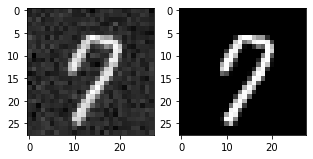

In [0]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img = np.reshape(train_X_noisy[10], (28,28))
plt.imshow(curr_img, cmap='gray')


plt.subplot(122)
curr_img = np.reshape(train_ground[10], (28,28))
plt.imshow(curr_img, cmap='gray')




In [0]:
batch_size = 64*8
epochs = 150
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

In [0]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
  
    return conv3

def decoder(conv3):    
    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 64
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    up1 = UpSampling2D((2,2))(conv5) #14 x 14 x 64
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up2 = UpSampling2D((2,2))(conv6) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [0]:
with strategy.scope():
 
  denoising_autoencoder = Model(input_img, decoder(encoder(input_img)))
  denoising_autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


de_autoencoder_train = denoising_autoencoder.fit(train_X_noisy, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_noisy, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0553 - val_loss: 0.1040
Epoch 2/150
48000/48000 [==============================] - 46s 965us/step - loss: 0.0173 - val_loss: 0.0826
Epoch 3/150
48000/48000 [==============================] - 47s 974us/step - loss: 0.0111 - val_loss: 0.2045
Epoch 4/150
48000/48000 [==============================] - 46s 963us/step - loss: 0.0086 - val_loss: 0.3914
Epoch 5/150
48000/48000 [==============================] - 47s 982us/step - loss: 0.0071 - val_loss: 0.1737
Epoch 6/150
48000/48000 [==============================] - 47s 972us/step - loss: 0.0060 - val_loss: 0.0067
Epoch 7/150
48000/48000 [==============================] - 47s 977us/step - loss: 0.0054 - val_loss: 0.0056
Epoch 8/150
48000/48000 [==============================] - 46s 953us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 9/150
48000/48000 [==============================] - 45s 939us/step - loss: 0.0047

In [0]:
denoising_autoencoder.save_weights('/content/drive/My Drive/fin_denoising_autoencoder.h5')

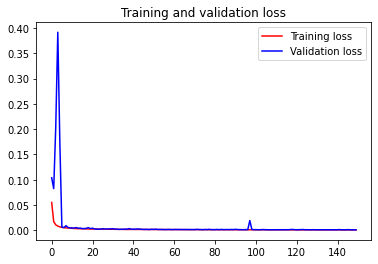

In [0]:
loss = de_autoencoder_train.history['loss']
val_loss = de_autoencoder_train.history['val_loss']
epochs = range(150)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
loaded_model = Model(input_img, decoder(encoder(input_img)))
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/fin_denoising_autoencoder.h5")


In [0]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X_noisy,valid_X_noisy,train_label,valid_label = train_test_split(noisy_train,train_Y_one_hot,test_size=0.2,random_state=13)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

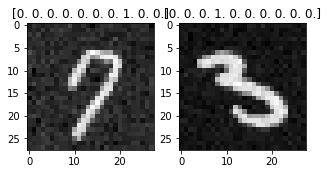

In [0]:
plt.figure(figsize=[5,5])
# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X_noisy[10], (28,28))
curr_lbl = train_label[10]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(valid_X_noisy[98], (28,28))
curr_lbl = valid_label[98]
plt.imshow(curr_img, cmap='gray')
plt.title(curr_lbl)

In [0]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    
    return conv3

In [0]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    lay = Dropout(0.5)(den)
    out = Dense(num_classes, activation='softmax')(lay)
    return out

In [0]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [0]:
for l1,l2 in zip(full_model.layers[:15],loaded_model.layers[0:15]):
    l1.set_weights(l2.get_weights())

In [0]:
for layer in full_model.layers[0:15]:
    layer.trainable = False

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
full_model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_73 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_74 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
classify_train = full_model.fit(train_X_noisy, train_label, batch_size=64*8,epochs=30,verbose=1,validation_data=(valid_X_noisy, valid_label))
#classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 11s 237us/step - loss: 0.4160 - accuracy: 0.8775 - val_loss: 0.1176 - val_accuracy: 0.9639
Epoch 2/30
48000/48000 [==============================] - 11s 229us/step - loss: 0.1495 - accuracy: 0.9534 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 3/30
48000/48000 [==============================] - 11s 227us/step - loss: 0.1077 - accuracy: 0.9661 - val_loss: 0.0747 - val_accuracy: 0.9781
Epoch 4/30
48000/48000 [==============================] - 11s 229us/step - loss: 0.0823 - accuracy: 0.9733 - val_loss: 0.0681 - val_accuracy: 0.9787
Epoch 5/30
48000/48000 [==============================] - 11s 225us/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 0.0685 - val_accuracy: 0.9785
Epoch 6/30
48000/48000 [==============================] - 10s 218us/step - loss: 0.0611 - accuracy: 0.9801 - val_loss: 0.0620 - val_accuracy: 0.9815
Epoch 7/30
48000/48000 [==============================] 

In [0]:
full_model.save_weights('/content/drive/My Drive/fin_autoencoder_classification.h5')

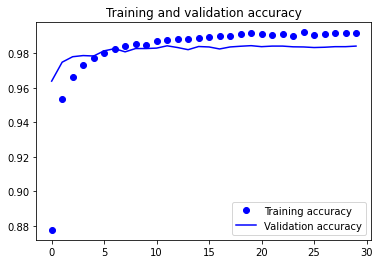

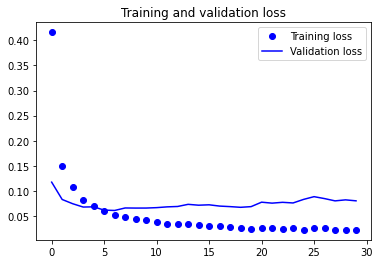

In [0]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_eval = full_model.evaluate(noisy_test, test_Y_one_hot, verbose=0)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07605720035590421
Test accuracy: 0.9850000143051147


In [0]:
predicted_classes = full_model.predict(noisy_test)


In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

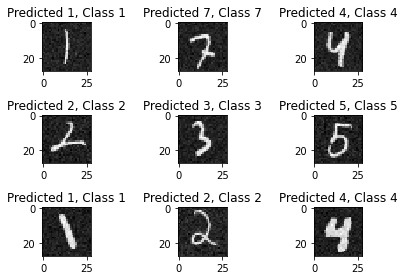

In [0]:
correct = np.where(predicted_classes==y_test)[0]
for i, correct in enumerate(correct[40:49]):
    plt.subplot(3,3,i+1)
    plt.imshow(noisy_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()